In [1]:
import numpy as np
from spec_id import Scale_model, Cluster, Cluster_model,Gauss_dist,Divide_cont
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

6806.51307862 12999.7831655
7702.33942224 11688.6626052


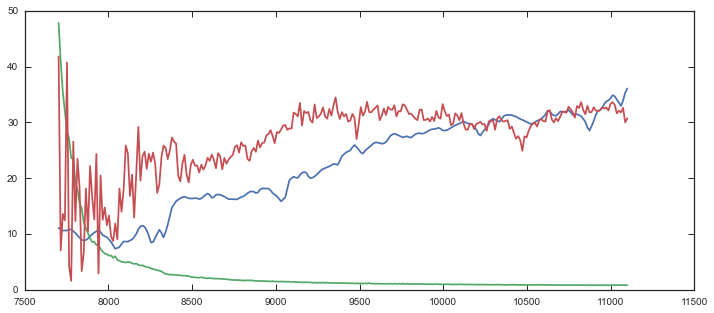

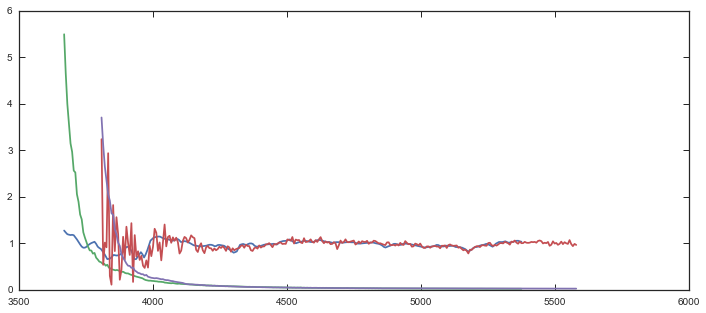

In [2]:
%matplotlib inline

wv,fl = np.load('clusters/ngc5927_griz.npy')

xwv,xfl,xer = np.load('spec_stacks_jan24/s39170_stack.npy')

print wv[0],wv[-1]
print xwv[0],xwv[-1]

ifl=interp1d(wv,fl)(xwv)
# ier=interp1d(wv,er)(xwv)

C=Scale_model(xfl,xer,ifl)


plt.figure(figsize=[12,5])
plt.plot(xwv[xwv<11100],ifl[xwv<11100])
plt.plot(xwv[xwv<11100],xer[xwv<11100]/C)
plt.plot(xwv[xwv<11100],xfl[xwv<11100]/C)
plt.show()

dwv,dfl,der=Divide_cont(xwv[xwv<11300],ifl[xwv<11300],xer[xwv<11300]/C,1.1)
dxwv,dxfl,dxer=Divide_cont(xwv[xwv<11300],xfl[xwv<11300],xer[xwv<11300],1.023)

plt.figure(figsize=[12,5])
plt.plot(dwv,dfl)
plt.plot(dwv,der)
plt.plot(dxwv,dxfl)
plt.plot(dxwv,dxer)
plt.show()

In [22]:
def Divide_cont(wave,flux,error, z):
    w =wave/(1 + z)

    m2r = [3175, 3280, 3340, 3515, 3550, 3650, 3710, 3770, 3800, 3850,
           3910, 3989, 3991, 4030, 4082, 4122, 4250, 4385, 4830, 4930, 4990, 5030, 5109, 5250]

    Mask = np.zeros(len(w))
    for i in range(len(Mask)):
        if m2r[0] <= w[i] <= m2r[1]:
            Mask[i] = 1
        if m2r[2] <= w[i] <= m2r[3]:
            Mask[i] = 1
        if m2r[4] <= w[i] <= m2r[5]:
            Mask[i] = 1
        if m2r[6] <= w[i] <= m2r[7]:
            Mask[i] = 1
        if m2r[8] <= w[i] <= m2r[9]:
            Mask[i] = 1
        if m2r[8] <= w[i] <= m2r[9]:
            Mask[i] = 1
        if m2r[10] < w[i] <= m2r[11]:
            Mask[i] = 1
        if m2r[12] <= w[i] <= m2r[13]:
            Mask[i] = 1
        if m2r[14] <= w[i] <= m2r[15]:
            Mask[i] = 1
        if m2r[16] <= w[i] <= m2r[17]:
            Mask[i] = 1
        if m2r[18] <= w[i] <= m2r[19]:
            Mask[i] = 1
        if m2r[20] <= w[i] <= m2r[21]:
            Mask[i] = 1
        if m2r[22] <= w[i] <= m2r[23]:
            Mask[i] = 1

    maskw = np.ma.masked_array(w, Mask)

    x3, x2, x1, x0 = np.ma.polyfit(maskw, flux, 3)
    C0 = x3 * w ** 3 + x2 * w ** 2 + x1 * w + x0

    flx = flux/C0
    err = error/C0

    return w, flx, err,C0

In [28]:
dwv,dfl,der,dc=Divide_cont_test(xwv,ifl,np.ones(len(ifl)),1.1)

11337.6655954


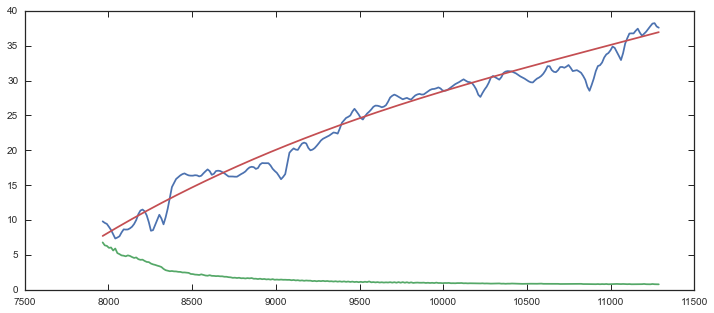

In [29]:
print max(xwv)

plt.figure(figsize=[12,5])
plt.plot(xwv[xwv<11300],ifl[xwv<11300])
plt.plot(xwv[xwv<11300],xer[xwv<11300]/C)
plt.plot(xwv[xwv<11300],dc[xwv<11300])
plt.show()

In [5]:
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,14.1,.1)
tau=[0]

M,A=np.meshgrid(metal,age)

cluster=[6528,6553,5927,6304,6388,6441]

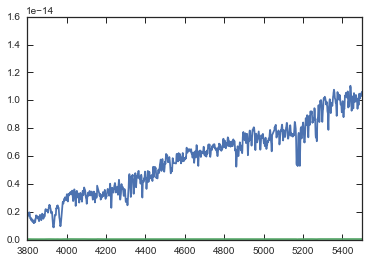

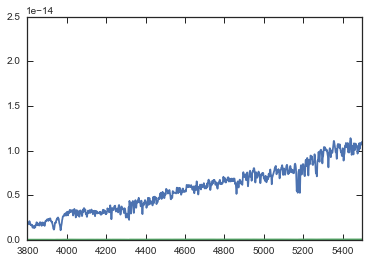

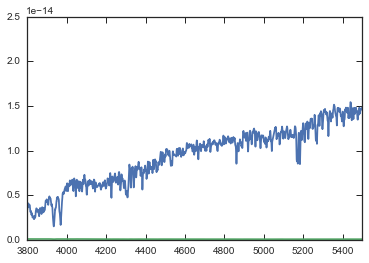

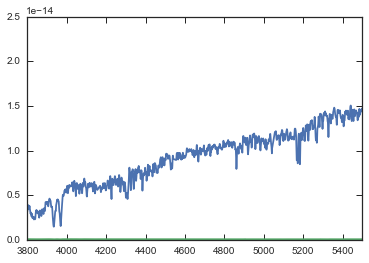

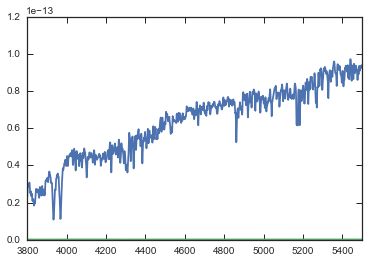

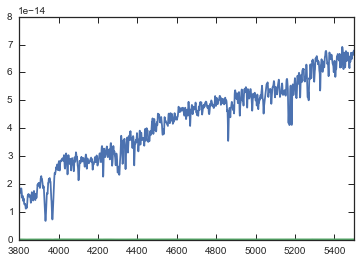

In [7]:
%matplotlib inline

fp='/Users/Vince.ec/cluster_list/'

for i in range(len(cluster)):
    dat=fits.open(fp+ 'NGC%s_a_1.fits' % cluster[i])
    aux_dat = fits.open(fp+ 'NGC%s_a_1.aux.fits' % cluster[i])[0].data
    flv = aux_dat[0]
    sn = aux_dat[3]
    start = dat[0].header['CRVAL1']
    step = dat[0].header['CDELT1']
    fl = dat[0].data
    wv = np.arange(start,start+len(fl)*step,step)
    IDX = [U for U in range(len(wv)) 
         if wv[U] < 4154 or 4165 < wv[U] < 4543 or 4555 < wv[U] < 5043 or wv[U] >5054]
    # ctable=Table([wv[IDX],fl[IDX]],names=['wv','flam'])
    # ascii.write(ctable,'clusters/ngc%s_spec.dat' % cluster[i])
    plt.figure(figsize=[10,5])
    plt.plot(wv[IDX],fl[IDX])
    plt.plot(wv[IDX],(fl/erdat)[IDX])
    plt.xlim(3800,5500)
    plt.show()
    plt.close()

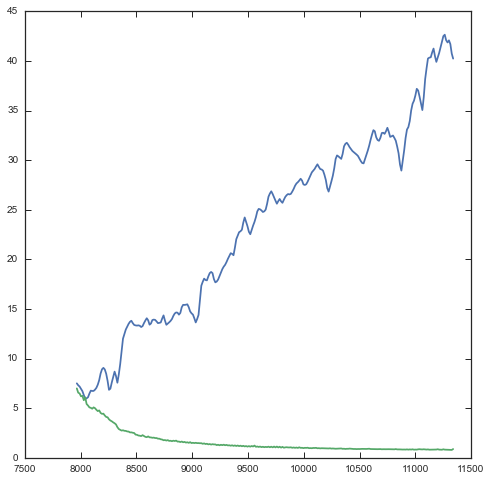

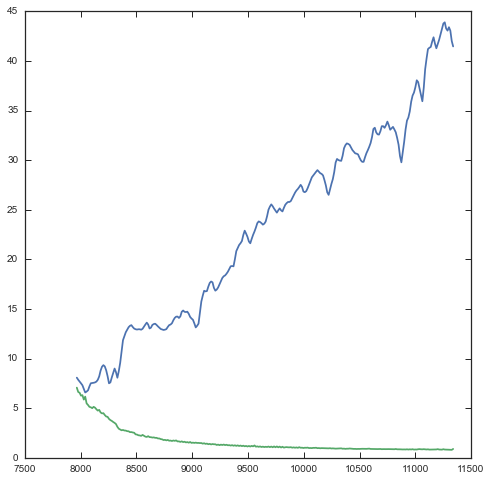

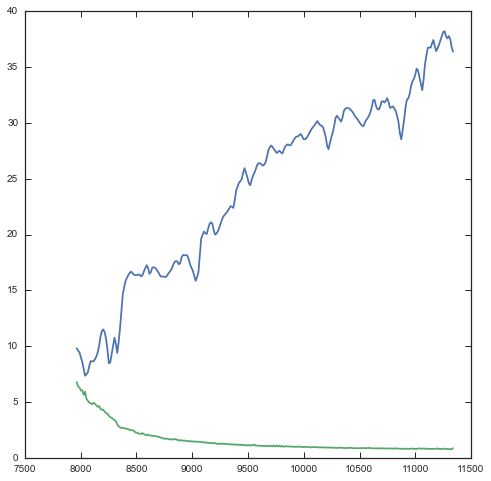

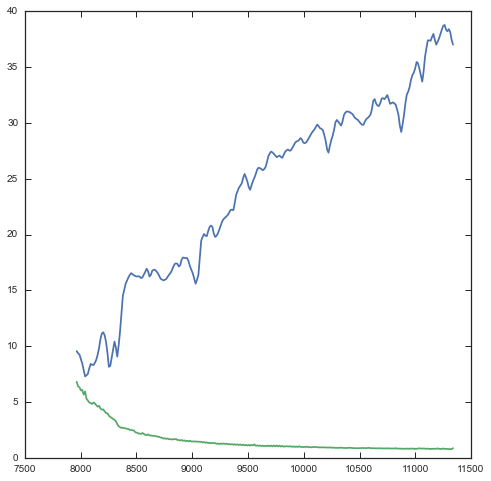

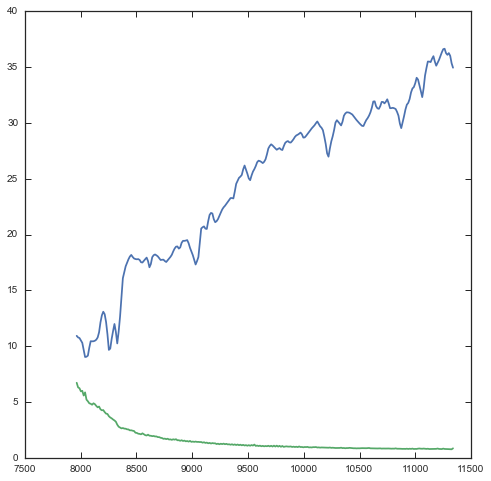

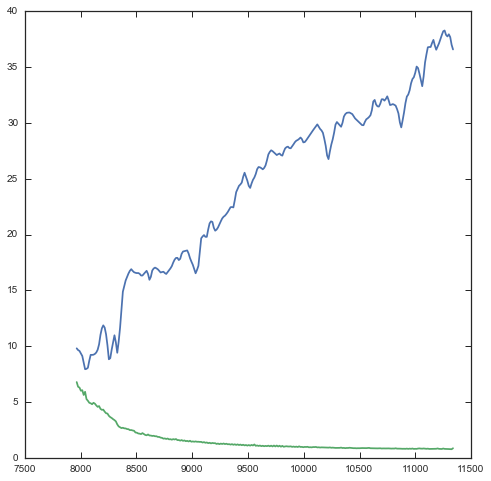

In [7]:
%matplotlib inline
cluster=[6528,6553,5927,6304,6388,6441]
fp='/Users/Vince.ec/cluster_list/'

xwv,xfl,xer = np.load('spec_stacks_jan24/s39170_stack.npy')

for i in range(len(cluster)):
    wave,fl=np.load('clusters/ngc%s_griz.npy' % cluster[i])
    ifl=interp1d(wave,fl)(xwv)
    C=Scale_model(xfl,xer,ifl)
    # np.save('clusters/ngc%s_griz_wer' % cluster[i],[xwv,ifl,xer/C])
    plt.figure(figsize=[8,8])
    plt.plot(xwv,ifl)
    plt.plot(xwv,xer/C)
    plt.show()
    plt.close()

In [2]:
%matplotlib inline

ngc6528=Cluster('clusters/ngc6528_griz_wer.npy')

ngc6528.Remove_continuum()

cmodel=Cluster_model(0.019,5.0,ngc6528.wv,ngc6528.fl,ngc6528.er)

cmodel.Remove_continuum()

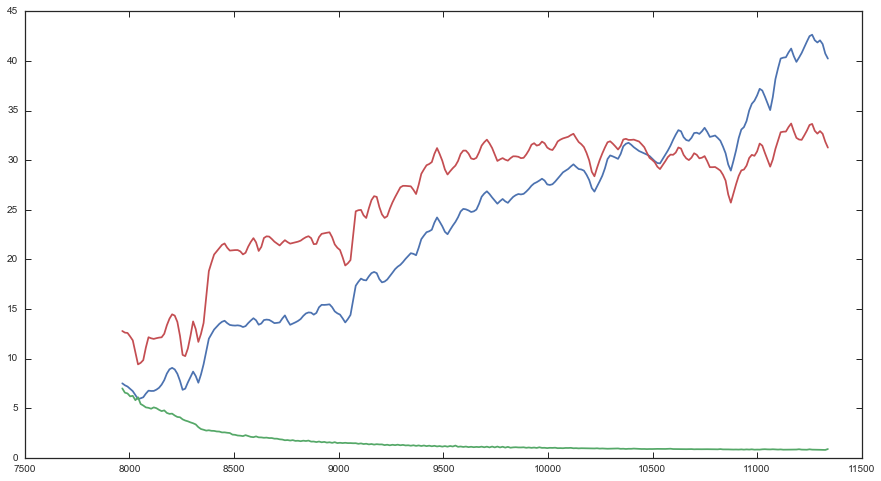

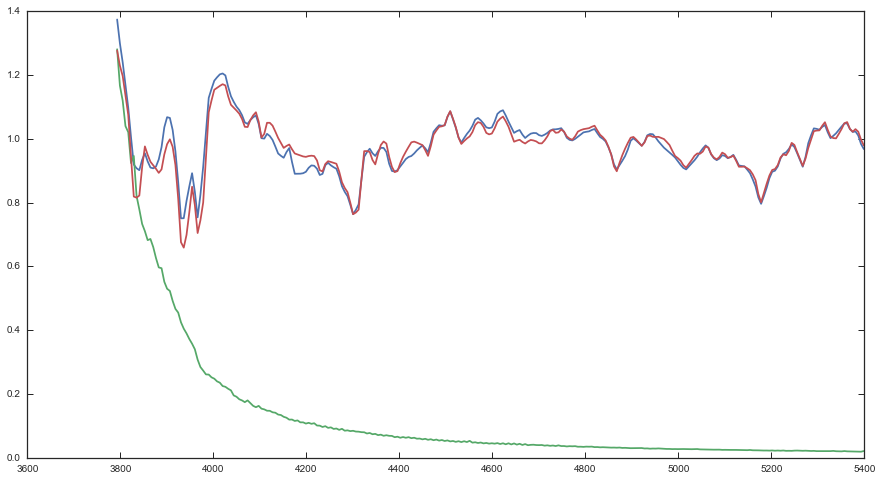

In [4]:
plt.figure(figsize=[15,8])
plt.plot(ngc6528.wv,ngc6528.fl)
plt.plot(ngc6528.wv,ngc6528.er)
plt.plot(cmodel.wv,cmodel.fl)
plt.show()
plt.close()

plt.figure(figsize=[15,8])
plt.plot(ngc6528.nc_wv,ngc6528.nc_fl)
plt.plot(ngc6528.nc_wv,ngc6528.nc_er)
plt.plot(cmodel.nc_wv,cmodel.nc_fl)
plt.show()
plt.close()

In [3]:
# cluster=[6528,6553,5927,6304,6388,6441]

ngc6528=Cluster('clusters/ngc6528_griz_wer.npy')
ngc6553=Cluster('clusters/ngc6553_griz_wer.npy')
ngc5927=Cluster('clusters/ngc5927_griz_wer.npy')
ngc6304=Cluster('clusters/ngc6304_griz_wer.npy')
ngc6388=Cluster('clusters/ngc6388_griz_wer.npy')
ngc6441=Cluster('clusters/ngc6441_griz_wer.npy')

In [6]:
ngc6528.Analyze_fit('chidat/ngc6528_flater_chidata.fits',metal,age)
ngc6553.Analyze_fit('chidat/ngc6553_flater_chidata.fits',metal,age)
ngc5927.Analyze_fit('chidat/ngc5927_flater_chidata.fits',metal,age)
ngc6304.Analyze_fit('chidat/ngc6304_flater_chidata.fits',metal,age)
ngc6388.Analyze_fit('chidat/ngc6388_flater_chidata.fits',metal,age)
ngc6441.Analyze_fit('chidat/ngc6441_flater_chidata.fits',metal,age)

[[39 28]]
Best fit model is 4.4 Gyr and 0.03 Z
[[28 28]]


Best fit model is 3.3 Gyr and 0.03 Z
[[28 28]]


Best fit model is 3.3 Gyr and 0.03 Z
[[27 28]]


Best fit model is 3.2 Gyr and 0.03 Z
[[43  8]]


Best fit model is 4.8 Gyr and 0.01 Z
[[20 28]]


Best fit model is 2.5 Gyr and 0.03 Z


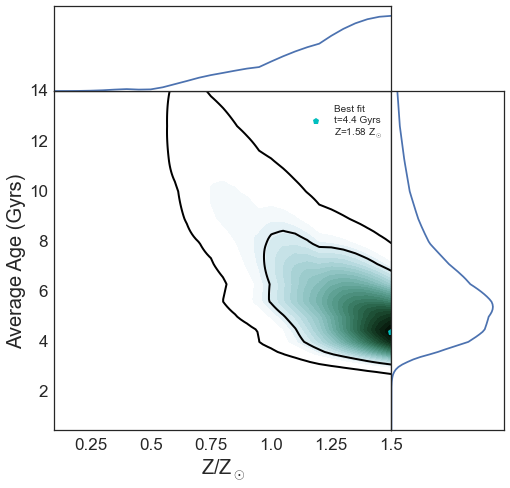

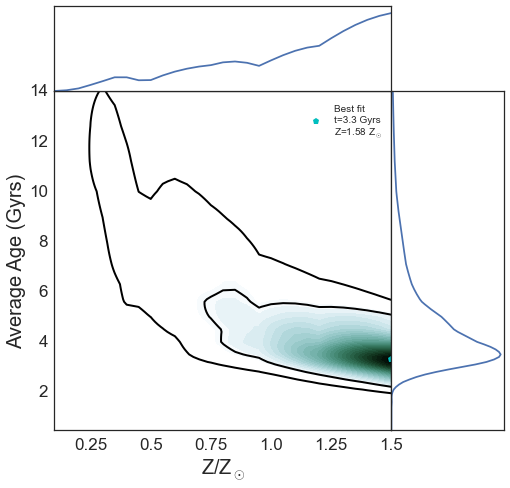

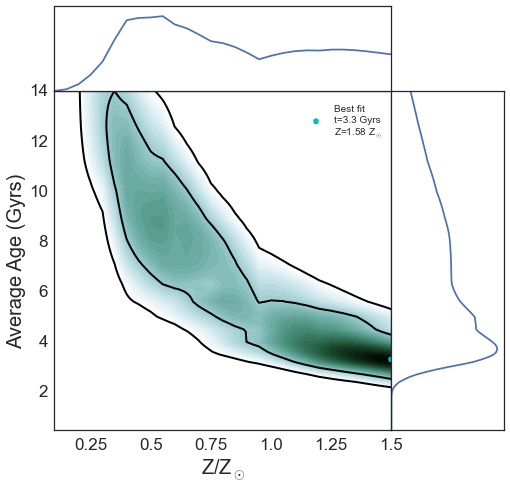

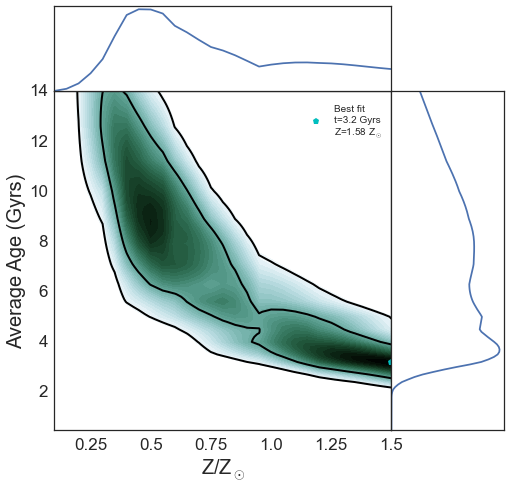

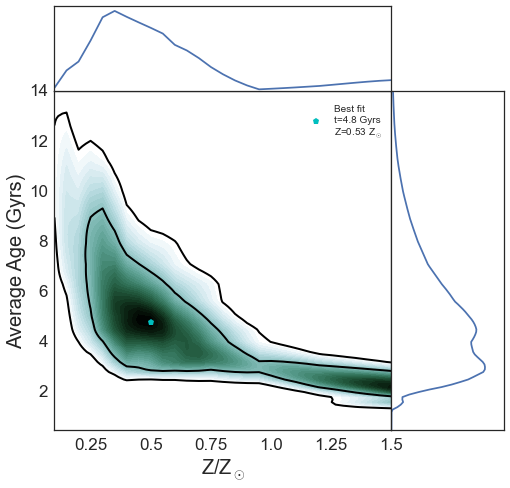

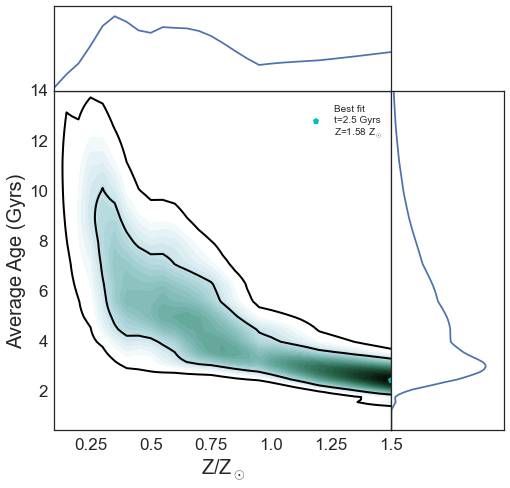

In [7]:
%matplotlib inline

ngc6528.Plot_2D_likelihood()
ngc6553.Plot_2D_likelihood()
ngc5927.Plot_2D_likelihood()
ngc6304.Plot_2D_likelihood()
ngc6388.Plot_2D_likelihood()
ngc6441.Plot_2D_likelihood()

6528
[[93 13]]


Best fit model is 9.8 Gyr and 0.015 Z


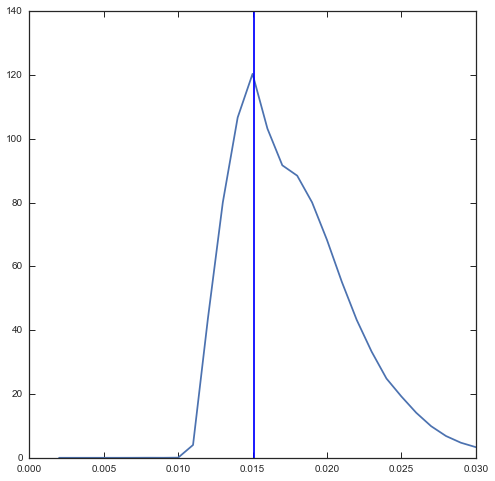

6553
[[52 15]]
Best fit model is 5.7 Gyr and 0.017 Z


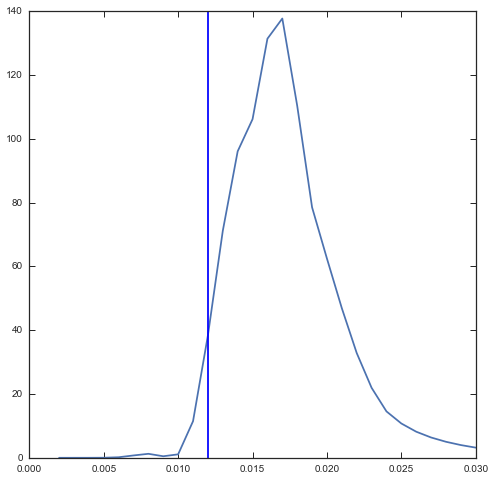

5927
[[111   4]]
Best fit model is 11.6 Gyr and 0.006 Z


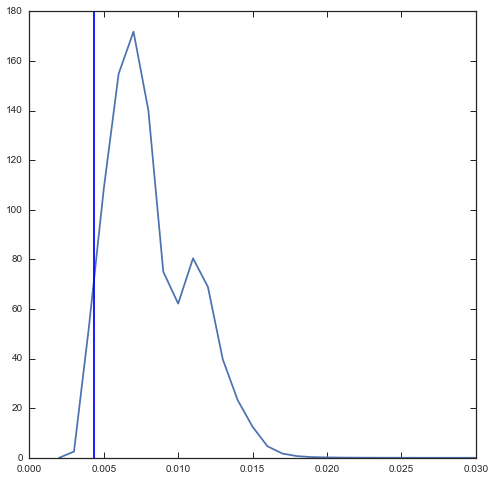

6304
[[92  3]]


Best fit model is 9.7 Gyr and 0.005 Z


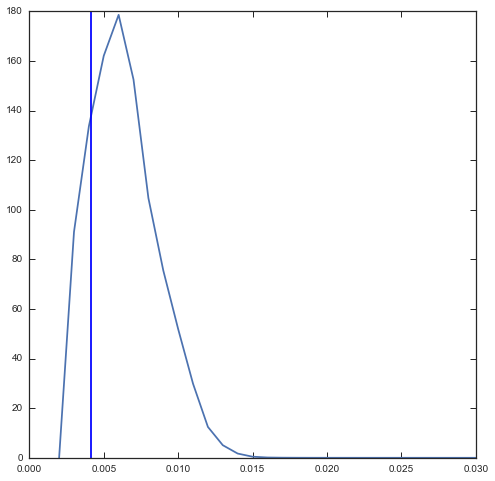

6388
[[45  4]]


Best fit model is 5.0 Gyr and 0.006 Z


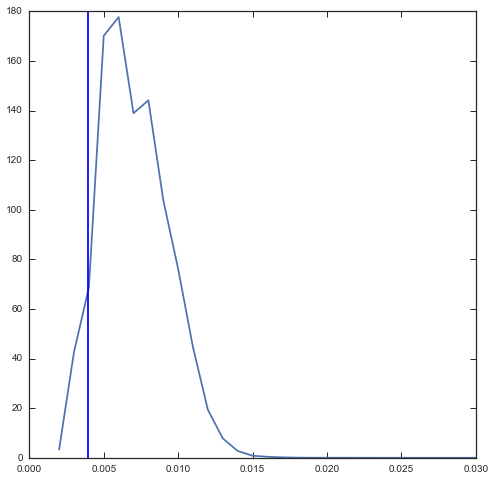

6441
[[49  5]]


Best fit model is 5.4 Gyr and 0.007 Z


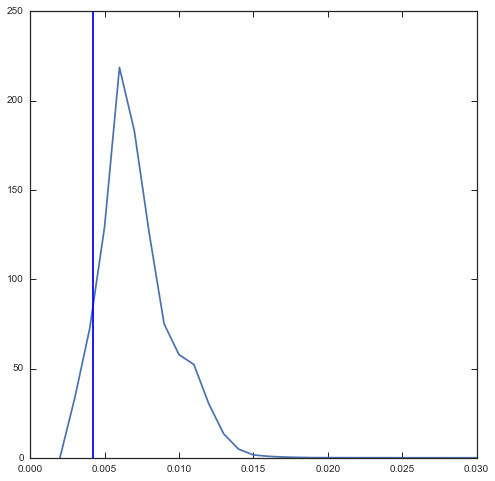

In [29]:
cluster=[6528,6553,5927,6304,6388,6441]
mfits = [-0.1, -0.2, -0.64, -0.66, -0.68, -0.65]

for i in range(len(cluster)):
    print cluster[i]
    ngc=Cluster('clusters/ngc%s_griz_wer.npy' % cluster[i])
    ngc.Analyze_fit('chidat/ngc%s_fit_chidata.fits' % cluster[i],metal,age)
    plt.figure(figsize=[8,8])
    plt.plot(metal,ngc.MP)
    plt.axvline(10**np.array(mfits[i])*.019)
    plt.show()
    plt.close()
    
    # ngc.Plot_2D_likelihood()
    # ngc.contour = 0
    # ngc.Analyze_fit('chidat/ngc%s_cer_fit_chidata.fits' % cluster[i],metal,age)
    # ngc.Plot_2D_likelihood()

6528
[[39 28]]


Best fit model is 4.4 Gyr and 0.03 Z


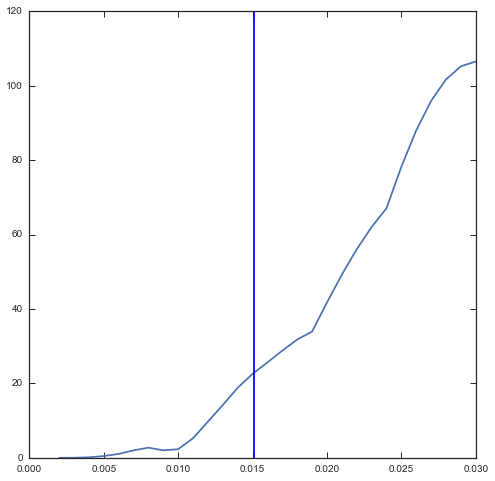

6553
[[28 28]]


Best fit model is 3.3 Gyr and 0.03 Z


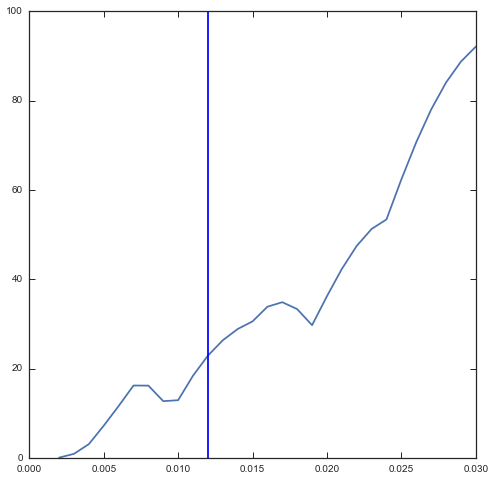

5927
[[28 28]]


Best fit model is 3.3 Gyr and 0.03 Z


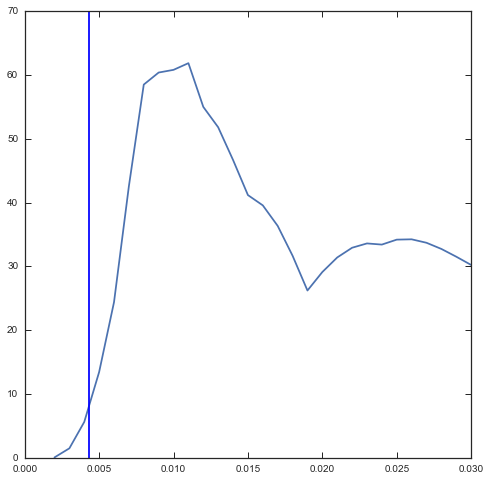

6304
[[27 28]]


Best fit model is 3.2 Gyr and 0.03 Z


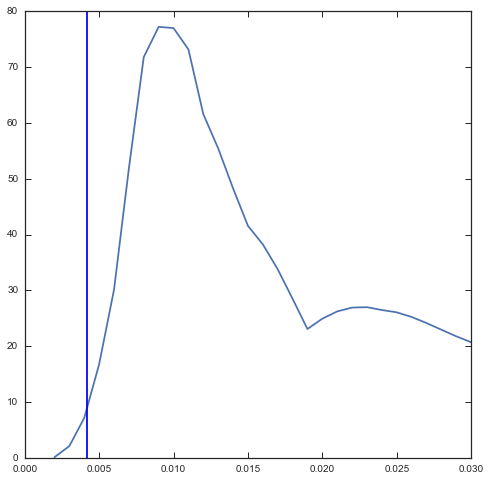

6388
[[43  8]]


Best fit model is 4.8 Gyr and 0.01 Z


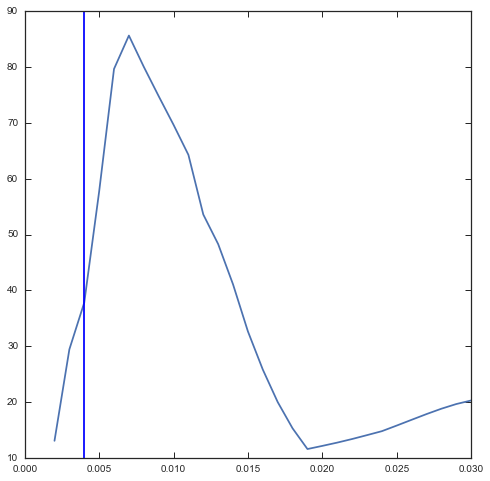

6441
[[20 28]]


Best fit model is 2.5 Gyr and 0.03 Z


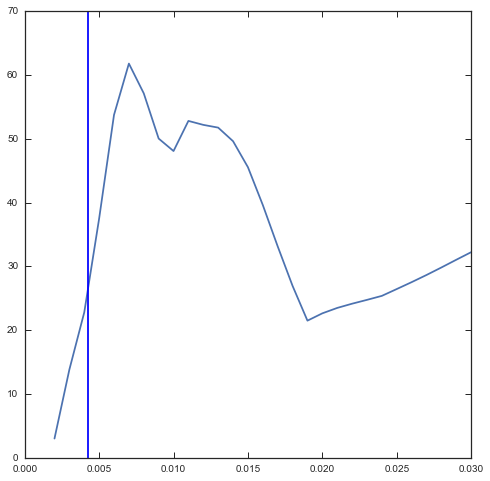

In [9]:
cluster=[6528,6553,5927,6304,6388,6441]
mfits = [-0.1, -0.2, -0.64, -0.66, -0.68, -0.65]

for i in range(len(cluster)):
    print cluster[i]
    ngc=Cluster('clusters/ngc%s_griz_wer.npy' % cluster[i])
    ngc.Analyze_fit('chidat/ngc%s_flater_chidata.fits' % cluster[i],metal,age)
    plt.figure(figsize=[8,8])
    plt.plot(metal,ngc.MP)
    plt.axvline(10**np.array(mfits[i])*.019)
    plt.show()
    plt.close()

In [28]:
10**np.array(mfits)*.019

array([ 0.01509224,  0.01198819,  0.00435265,  0.00415675,  0.00396966,
        0.00425357])

In [12]:
ngc6304.Remove_continuum()
model_6304 = Cluster_model(0.005,9.7,ngc6304.wv,ngc6304.fl,ngc6304.er)
model_6304.Remove_continuum()

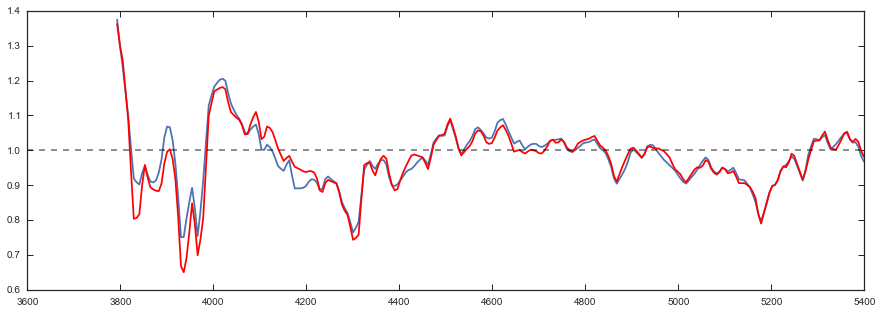

In [17]:
plt.figure(figsize=[15,5])
plt.plot(ngc6528.nc_wv,ngc6528.nc_fl)
plt.plot(model_6528.nc_wv,model_6528.nc_fl,'r')
plt.axhline(1,color='k',linestyle='--',alpha=.5)
plt.show()
plt.close()

In [56]:
residuals=[]
for i in range(len(metal)):
    for ii in range(len(age)):
        resmodel = Cluster_model(metal[i],age[ii],ngc6304.wv,ngc6304.fl,ngc6304.er)
        resmodel.Remove_continuum()
        residuals.append(np.abs(ngc6528.nc_fl - resmodel.nc_fl))
res=np.transpose(residuals)
mpwave=np.array([np.mean(U) for U in res])

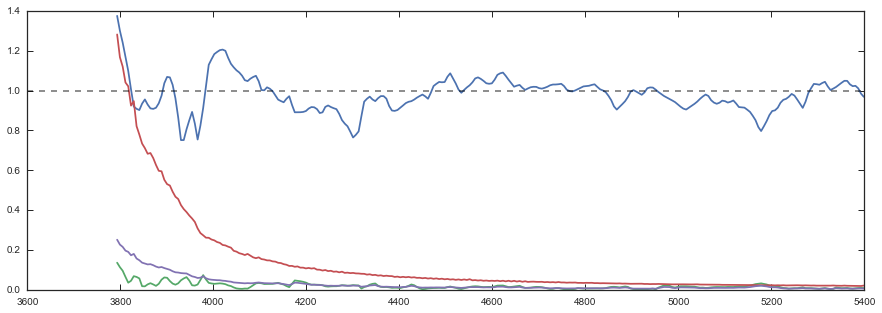

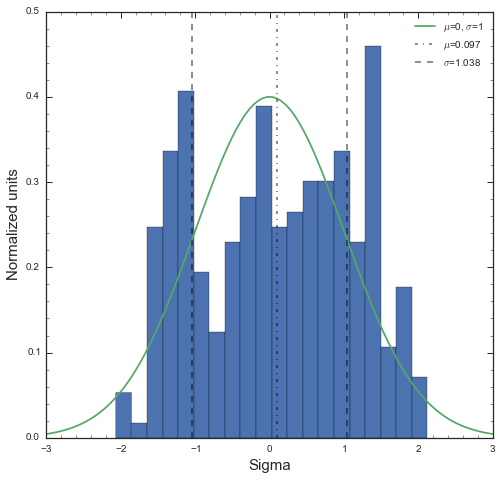

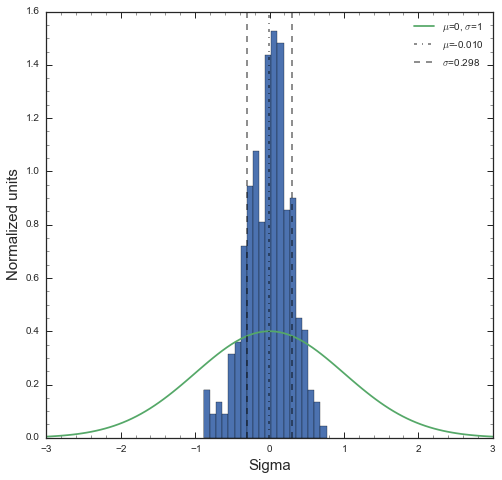

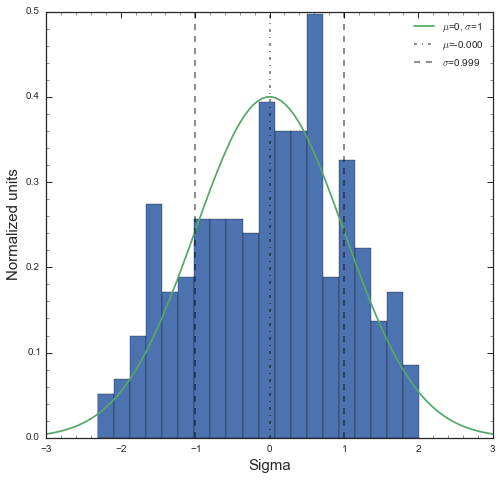

In [98]:
stdres = (ngc6528.nc_fl - model_6528.nc_fl)/(mpwave*.7)

combo_er = np.sqrt((ngc6528.nc_er*.185)**2 + (mpwave*.43)**2)

plt.figure(figsize=[15,5])
plt.plot(ngc6528.nc_wv,ngc6528.nc_fl)
plt.plot(ngc6528.nc_wv,mpwave*.7)
plt.plot(ngc6528.nc_wv,ngc6528.nc_er)
plt.plot(ngc6528.nc_wv,combo_er)
plt.axhline(1,color='k',linestyle='--',alpha=.5)
plt.show()
plt.close()

rng=np.linspace(-3,3,100)
plt.figure(figsize=[8,8])
plt.hist(stdres,20,normed=True)
plt.plot(rng,Gauss_dist(rng,0,1),label='$\mu$=0, $\sigma$=1')
plt.axvline(np.mean(stdres),color='k',alpha=.5,linestyle='-.',label='$\mu$=%0.3f' % np.mean(stdres))
plt.axvline(np.std(stdres),color='k',alpha=.5,linestyle='--',label='$\sigma$=%0.3f' % np.std(stdres))
plt.axvline(-np.std(stdres),color='k',alpha=.5,linestyle='--')
plt.xlabel('Sigma',size=15)
plt.ylabel('Normalized units',size=15)
plt.legend()
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.gcf().subplots_adjust(bottom=0.16)
plt.show()
plt.close()

stdres = (ngc6528.nc_fl - model_6528.nc_fl)/(ngc6528.nc_er)

rng=np.linspace(-3,3,100)
plt.figure(figsize=[8,8])
plt.hist(stdres,20,normed=True)
plt.plot(rng,Gauss_dist(rng,0,1),label='$\mu$=0, $\sigma$=1')
plt.axvline(np.mean(stdres),color='k',alpha=.5,linestyle='-.',label='$\mu$=%0.3f' % np.mean(stdres))
plt.axvline(np.std(stdres),color='k',alpha=.5,linestyle='--',label='$\sigma$=%0.3f' % np.std(stdres))
plt.axvline(-np.std(stdres),color='k',alpha=.5,linestyle='--')
plt.xlabel('Sigma',size=15)
plt.ylabel('Normalized units',size=15)
plt.legend()
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.gcf().subplots_adjust(bottom=0.16)
plt.show()
plt.close()

stdres = (ngc6528.nc_fl - model_6528.nc_fl)/combo_er

rng=np.linspace(-3,3,100)
plt.figure(figsize=[8,8])
plt.hist(stdres,20,normed=True)
plt.plot(rng,Gauss_dist(rng,0,1),label='$\mu$=0, $\sigma$=1')
plt.axvline(np.mean(stdres),color='k',alpha=.5,linestyle='-.',label='$\mu$=%0.3f' % np.mean(stdres))
plt.axvline(np.std(stdres),color='k',alpha=.5,linestyle='--',label='$\sigma$=%0.3f' % np.std(stdres))
plt.axvline(-np.std(stdres),color='k',alpha=.5,linestyle='--')
plt.xlabel('Sigma',size=15)
plt.ylabel('Normalized units',size=15)
plt.legend()
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.gcf().subplots_adjust(bottom=0.16)
plt.show()
plt.close()

In [86]:
perc_chg=np.arange(0.02, 1.0, 0.005)

mu=np.zeros([len(perc_chg),len(perc_chg)])
sigma=np.zeros([len(perc_chg),len(perc_chg)])

for i in range(len(perc_chg)):
    for ii in range(len(perc_chg)):
        combo_er = np.sqrt((ngc6528.nc_er * perc_chg[i])**2 + (mpwave * perc_chg[ii])**2)
        stdres = (ngc6528.nc_fl - model_6528.nc_fl)/combo_er
        mu[i][ii]=np.mean(stdres)
        sigma[i][ii]=np.abs(np.std(stdres)-1)

In [2]:
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,14.1,.1)
tau=[0]

ngc6528=Cluster('clusters/ngc6528_griz_wer.npy')
ngc6553=Cluster('clusters/ngc6553_griz_wer.npy')
ngc5927=Cluster('clusters/ngc5927_griz_wer.npy')
ngc6304=Cluster('clusters/ngc6304_griz_wer.npy')
ngc6388=Cluster('clusters/ngc6388_griz_wer.npy')
ngc6441=Cluster('clusters/ngc6441_griz_wer.npy')

ngc6528.Remove_continuum()
ngc6553.Remove_continuum()
ngc5927.Remove_continuum()
ngc6304.Remove_continuum()
ngc6388.Remove_continuum()
ngc6441.Remove_continuum()

ngc6528.Analyze_fit('chidat/ngc6528_fit_chidata.fits',metal,age)
ngc6553.Analyze_fit('chidat/ngc6553_fit_chidata.fits',metal,age)
ngc5927.Analyze_fit('chidat/ngc5927_fit_chidata.fits',metal,age)
ngc6304.Analyze_fit('chidat/ngc6304_fit_chidata.fits',metal,age)
ngc6388.Analyze_fit('chidat/ngc6388_fit_chidata.fits',metal,age)
ngc6441.Analyze_fit('chidat/ngc6441_fit_chidata.fits',metal,age)

ngc6528.Best_fit_spec()
ngc6553.Best_fit_spec()
ngc5927.Best_fit_spec()
ngc6304.Best_fit_spec()
ngc6388.Best_fit_spec()
ngc6441.Best_fit_spec()

[[93 13]]
Best fit model is 9.8 Gyr and 0.015 Z
[[52 15]]


Best fit model is 5.7 Gyr and 0.017 Z
[[111   4]]
Best fit model is 11.6 Gyr and 0.006 Z
[[92  3]]
Best fit model is 9.7 Gyr and 0.005 Z
[[45  4]]
Best fit model is 5.0 Gyr and 0.006 Z
[[49  5]]
Best fit model is 5.4 Gyr and 0.007 Z


In [16]:
residuals=[]
for i in range(len(metal)):
    for ii in range(len(age)):
        resmodel = Cluster_model(metal[i],age[ii],ngc6553.wv,ngc6553.fl,ngc6553.er)
        resmodel.Remove_continuum()
        residuals.append(np.abs(ngc6553.nc_fl - resmodel.nc_fl))
res=np.transpose(residuals)
mpwave=np.array([np.mean(U) for U in res])

perc_chg=np.arange(0.02, 1.0, 0.005)

mu=np.zeros([len(perc_chg),len(perc_chg)])
sigma=np.zeros([len(perc_chg),len(perc_chg)])

for i in range(len(perc_chg)):
    for ii in range(len(perc_chg)):
        combo_er = np.sqrt((ngc6553.nc_er * perc_chg[i])**2 + (mpwave * perc_chg[ii])**2)
        stdres = (ngc6553.nc_fl - ngc6553.nc_mfl)/combo_er
        mu[i][ii]=np.mean(stdres)
        sigma[i][ii]=np.abs(np.std(stdres)-1)
        
[idmin] = np.argwhere((np.abs(mu)+sigma) == np.min((np.abs(mu)+sigma)))

print perc_chg[idmin[0]]
print perc_chg[idmin[1]]

0.26
0.26


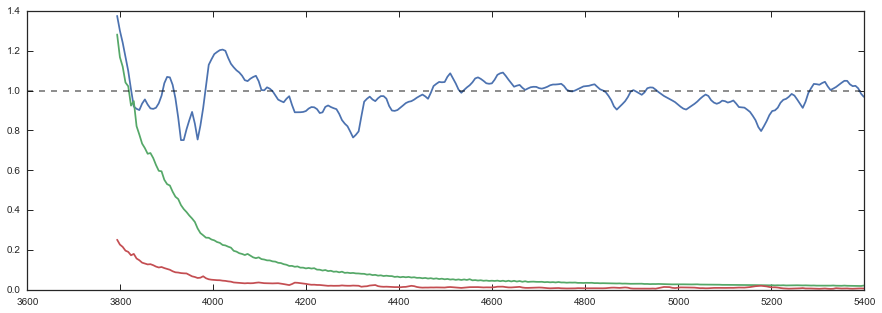

In [15]:
%matplotlib inline

combo_er = np.sqrt((ngc6553.nc_er*.185)**2 + (mpwave*.43)**2)
C = ngc6553.fl/ngc6528.nc_fl

np.save('clusters/ngc6528_griz_cer',[ngc6528.wv,ngc6528.fl,C*combo_er])

plt.figure(figsize=[15,5])
plt.plot(ngc6528.nc_wv,ngc6528.nc_fl)
plt.plot(ngc6528.nc_wv,ngc6528.nc_er)
plt.plot(ngc6528.nc_wv,combo_er)
plt.axhline(1,color='k',linestyle='--',alpha=.5)
plt.show()
plt.close()

In [17]:
cluster=[6528,6553,5927,6304,6388,6441]
perc_chg=np.arange(0.02, 1.0, 0.005)

for i in range(len(cluster)):

    ngc=Cluster('clusters/ngc%s_griz_wer.npy' % cluster[i])
    ngc.Remove_continuum()
    ngc.Analyze_fit('chidat/ngc%s_fit_chidata.fits' % cluster[i],metal,age)
    ngc.Best_fit_spec()
    
    residuals=[]
    for ii in range(len(metal)):
        for iii in range(len(age)):
            resmodel = Cluster_model(metal[ii],age[iii],ngc.wv,ngc.fl,ngc.er)
            resmodel.Remove_continuum()
            residuals.append(np.abs(ngc.nc_fl - resmodel.nc_fl))
    res=np.transpose(residuals)
    mpwave=np.array([np.mean(U) for U in res])
    
    mu=np.zeros([len(perc_chg),len(perc_chg)])
    sigma=np.zeros([len(perc_chg),len(perc_chg)])
    
    for ii in range(len(perc_chg)):
        for iii in range(len(perc_chg)):
            combo_er = np.sqrt((ngc.nc_er * perc_chg[ii])**2 + (mpwave * perc_chg[iii])**2)
            stdres = (ngc.nc_fl - ngc.nc_mfl)/combo_er
            mu[ii][iii]=np.mean(stdres)
            sigma[ii][iii]=np.abs(np.std(stdres)-1)
            
    [idmin] = np.argwhere((np.abs(mu)+sigma) == np.min((np.abs(mu)+sigma)))
    
    print perc_chg[idmin[0]]
    print perc_chg[idmin[1]]
    combo_er = np.sqrt((ngc.nc_er*perc_chg[idmin[0]])**2 + (mpwave*perc_chg[idmin[1]])**2)
    C = ngc.fl/ngc.nc_fl
    
    np.save('clusters/ngc%s_griz_cer' % cluster[i], [ngc.wv,ngc.fl,C*combo_er])

[[93 13]]
Best fit model is 9.8 Gyr and 0.015 Z
0.185


0.43
[[52 15]]


Best fit model is 5.7 Gyr and 0.017 Z
0.26


0.26
[[111   4]]


Best fit model is 11.6 Gyr and 0.006 Z
0.195


0.325
[[92  3]]


Best fit model is 9.7 Gyr and 0.005 Z
0.215


0.33
[[45  4]]
Best fit model is 5.0 Gyr and 0.006 Z
0.205


0.36
[[49  5]]


Best fit model is 5.4 Gyr and 0.007 Z
0.25


0.265


In [2]:
fp = '../../../cluster_list/'

dato= fits.open(fp +'NGC6528_a_1.fits')
dat1= fits.open(fp +'NGC6528_a_1.aux.fits')

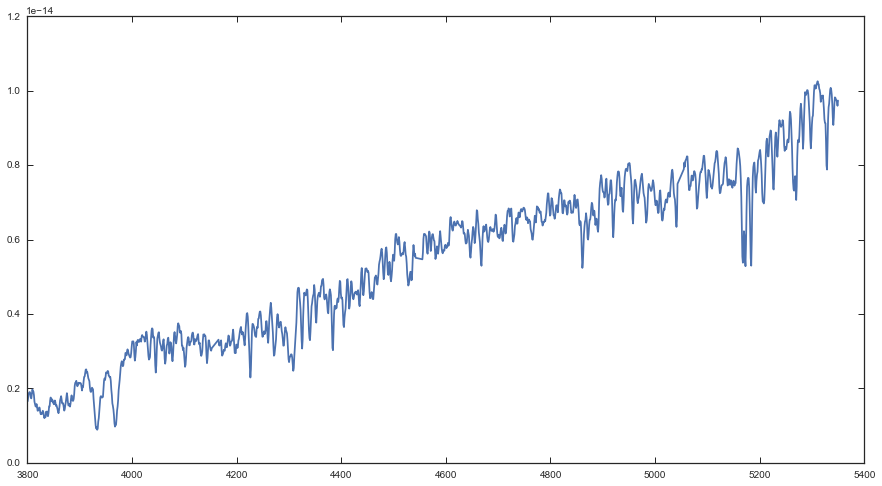

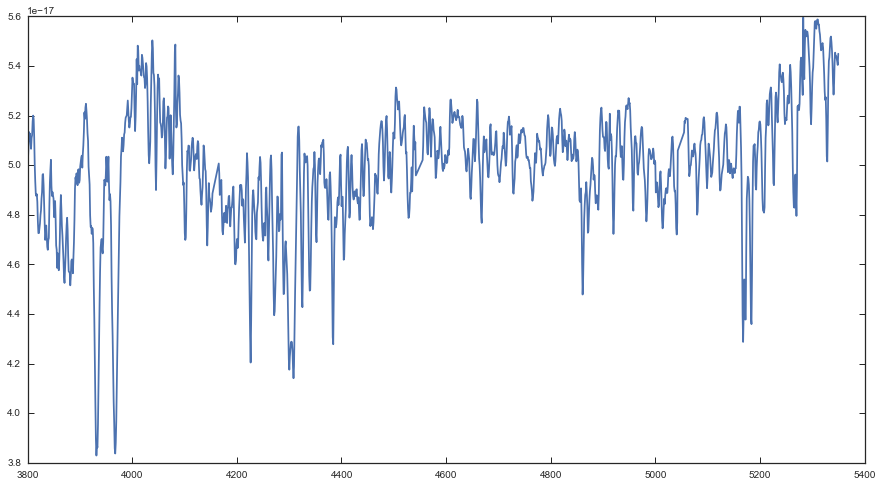

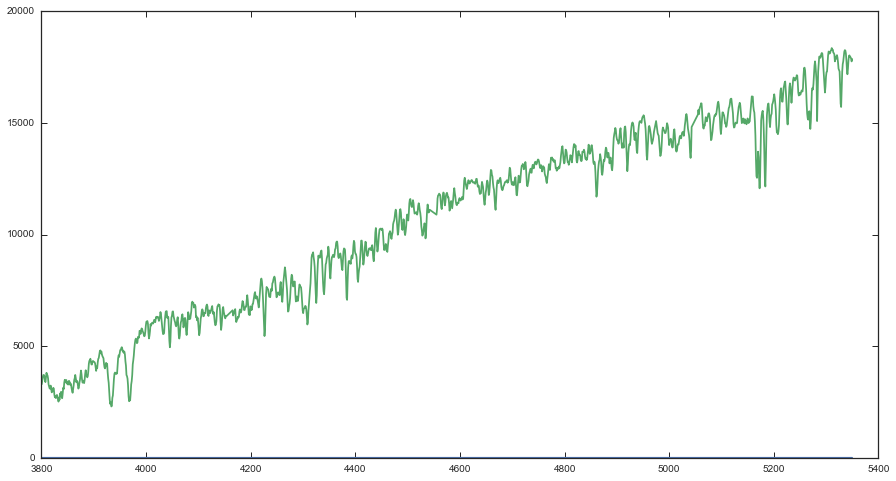

In [5]:
%matplotlib  inline

wv1,fl1 = Readfile('clusters/ngc6528_spec.dat')

start=dat1[0].header['CRVAL1']
step=dat1[0].header['CDELT1']
wv=np.arange(start,start+len(dat1[0].data[0])*step,step)

IDc=[U for U in range(len(wv)) if wv[U] < 4154 or 4165 < wv[U] < 4543 or 4555 < wv[U] < 5043 or wv[U] >5054]
wv=wv[IDc]
flo=dato[0].data[IDc]
fl=dat1[0].data[0][IDc]
sn=dat1[0].data[3][IDc]
IDX = [U for U in range(len(wv)) if 3800 <= wv[U] <= 5350]

plt.figure(figsize=[15,8])
plt.plot(wv[IDX],(flo)[IDX])
plt.show()
plt.close()

plt.figure(figsize=[15,8])
plt.plot(wv[IDX],(flo/sn)[IDX])
plt.show()
plt.close()

plt.figure(figsize=[15,8])
plt.plot(wv[IDX],(flo)[IDX])
plt.plot(wv[IDX],(100*sn)[IDX])
plt.show()
plt.close()

# plt.figure(figsize=[15,8])
# # plt.plot(wv[IDX],dat2[0].data[0][IDX])
# plt.plot(wv,sn/fl)
# 
# plt.show()
# plt.close()

dat=Table([wv,flo],names=['wv', 'fl'])
ascii.write(dat,'clusters/ngc6528_spec_fc.dat')

dat=Table([wv,flo/sn],names=['wv', 'er'])
ascii.write(dat,'clusters/ngc6528_err_fc.dat')